In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

인구 구조가 알고 싶은 지역의 이름( 읍면동 단위)을 입력해주세요 : 제주특별자치도


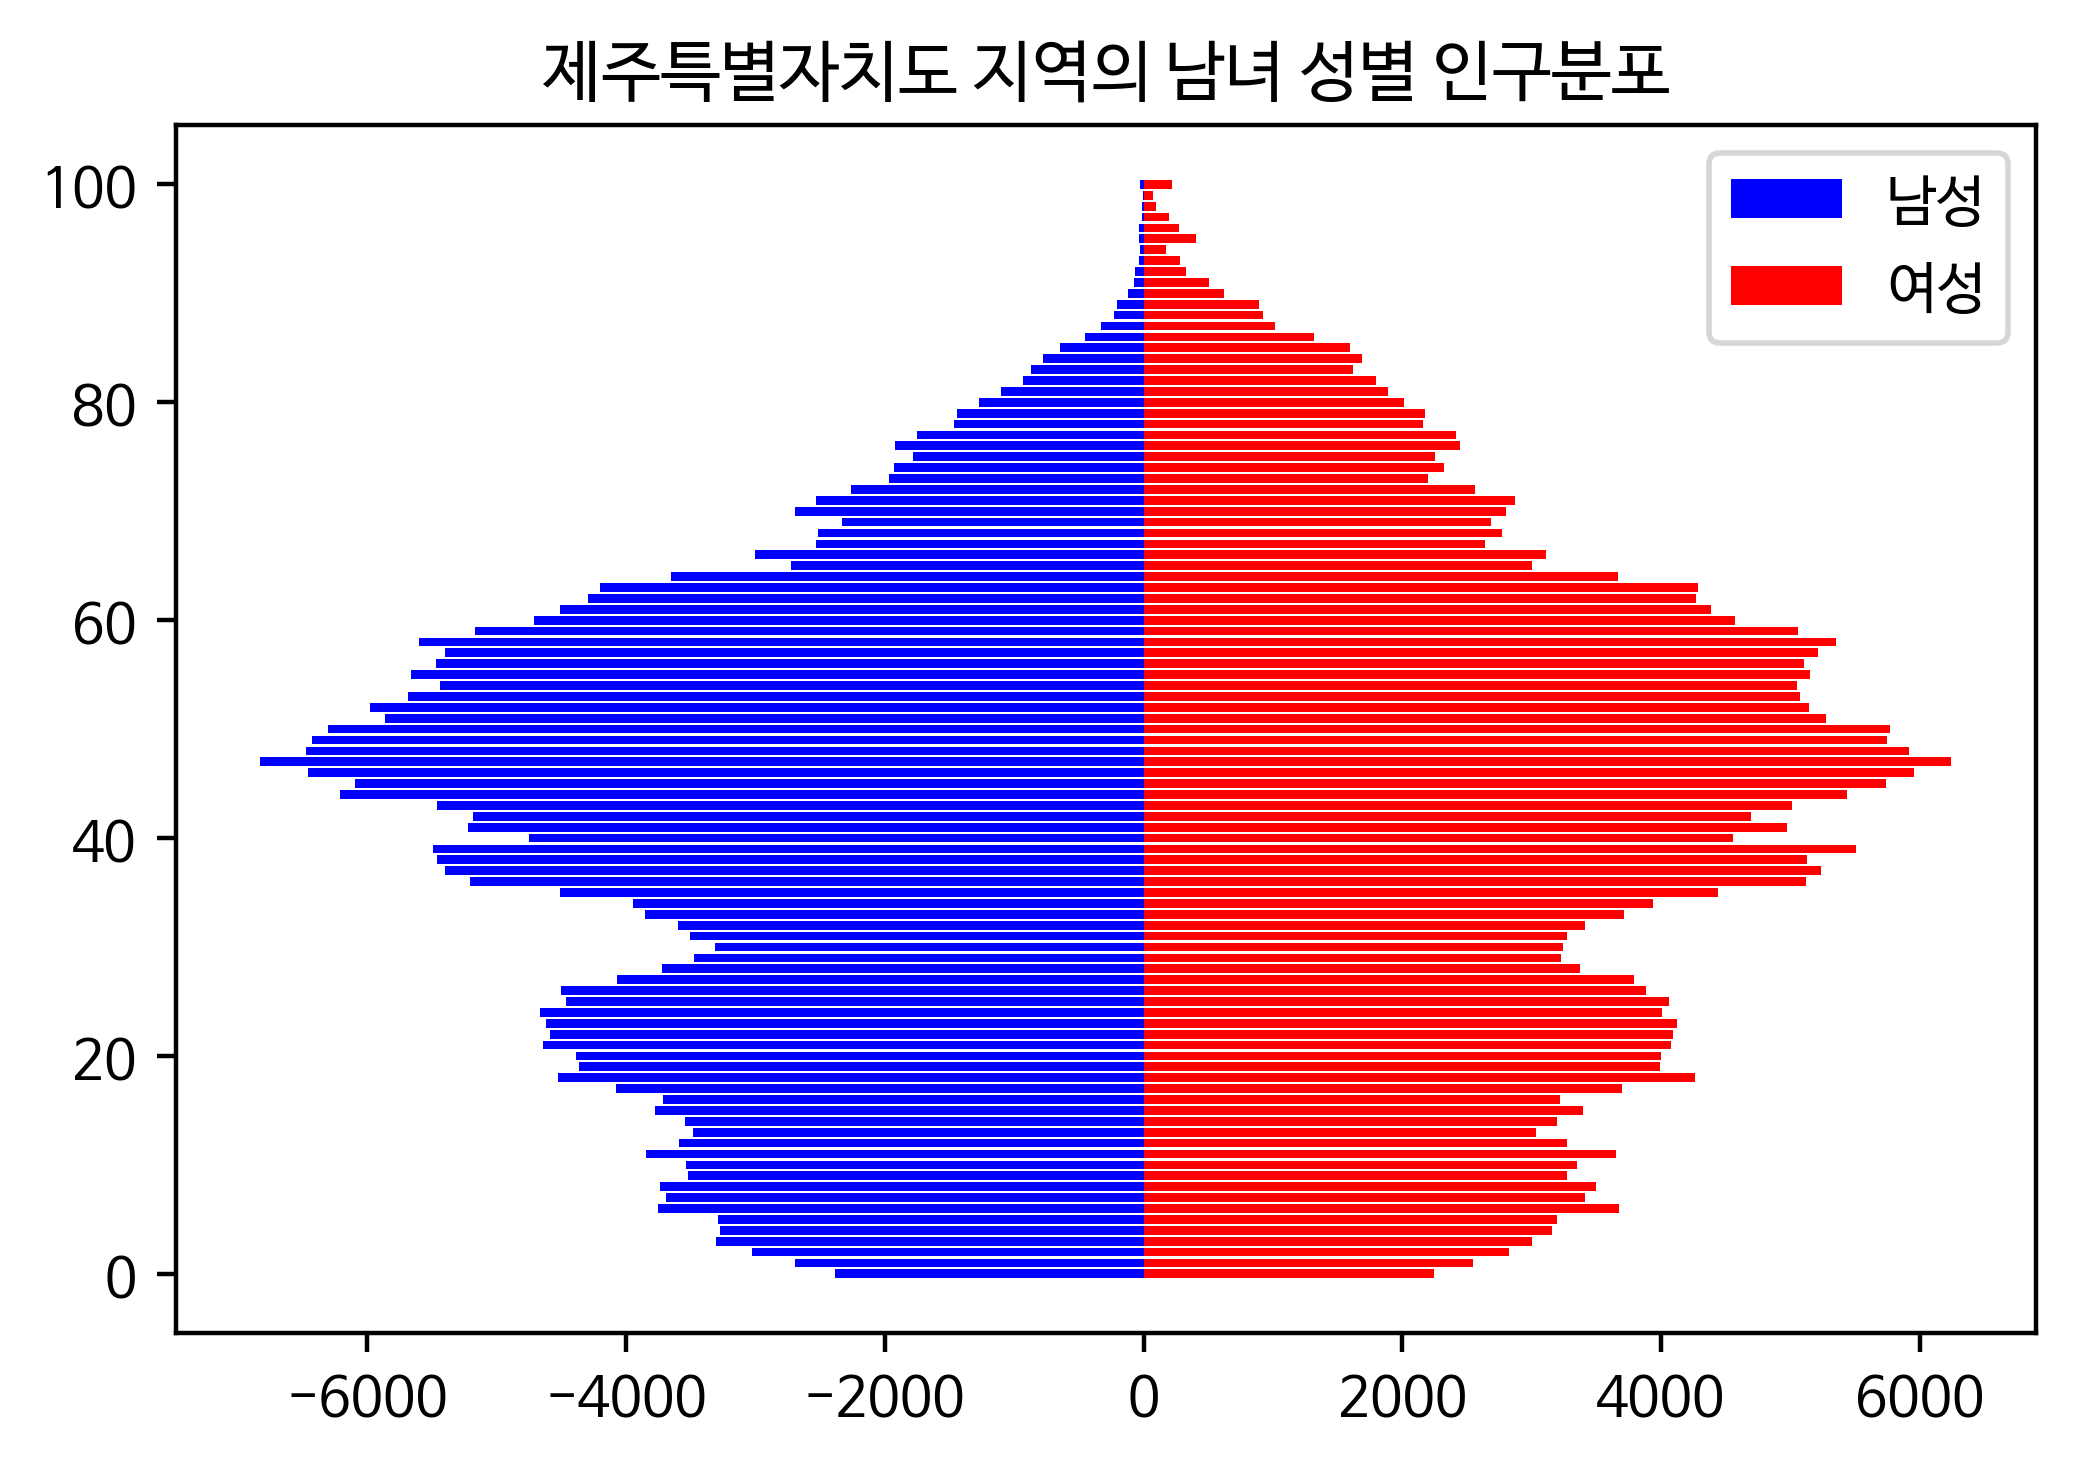

In [6]:
import csv
import matplotlib.pyplot as plt

f= open('gender.csv', encoding = 'cp949')
data=csv.reader(f)
m =[]
f =[]

name = input("인구 구조가 알고 싶은 지역의 이름( 읍면동 단위)을 입력해주세요 : ")


for row in data:
  if name in row[0]:
    for i in row[3:104]:    # 남성 : 3~103번 데이터 슬라이싱 
      m.append(-int(i.replace(',','')))
    for i in row[106:]:     # 여성 : 106~ 끝까지 데이터 슬라이싱
      f.append(int(i.replace(',',''))) 
    break


plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.barh(range(101),m,color='b',label ='남성')
plt.barh(range(101),f,color='r',label='여성')
plt.legend()
plt.title(name +" 지역의 남녀 성별 인구분포")

plt.show()

항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie


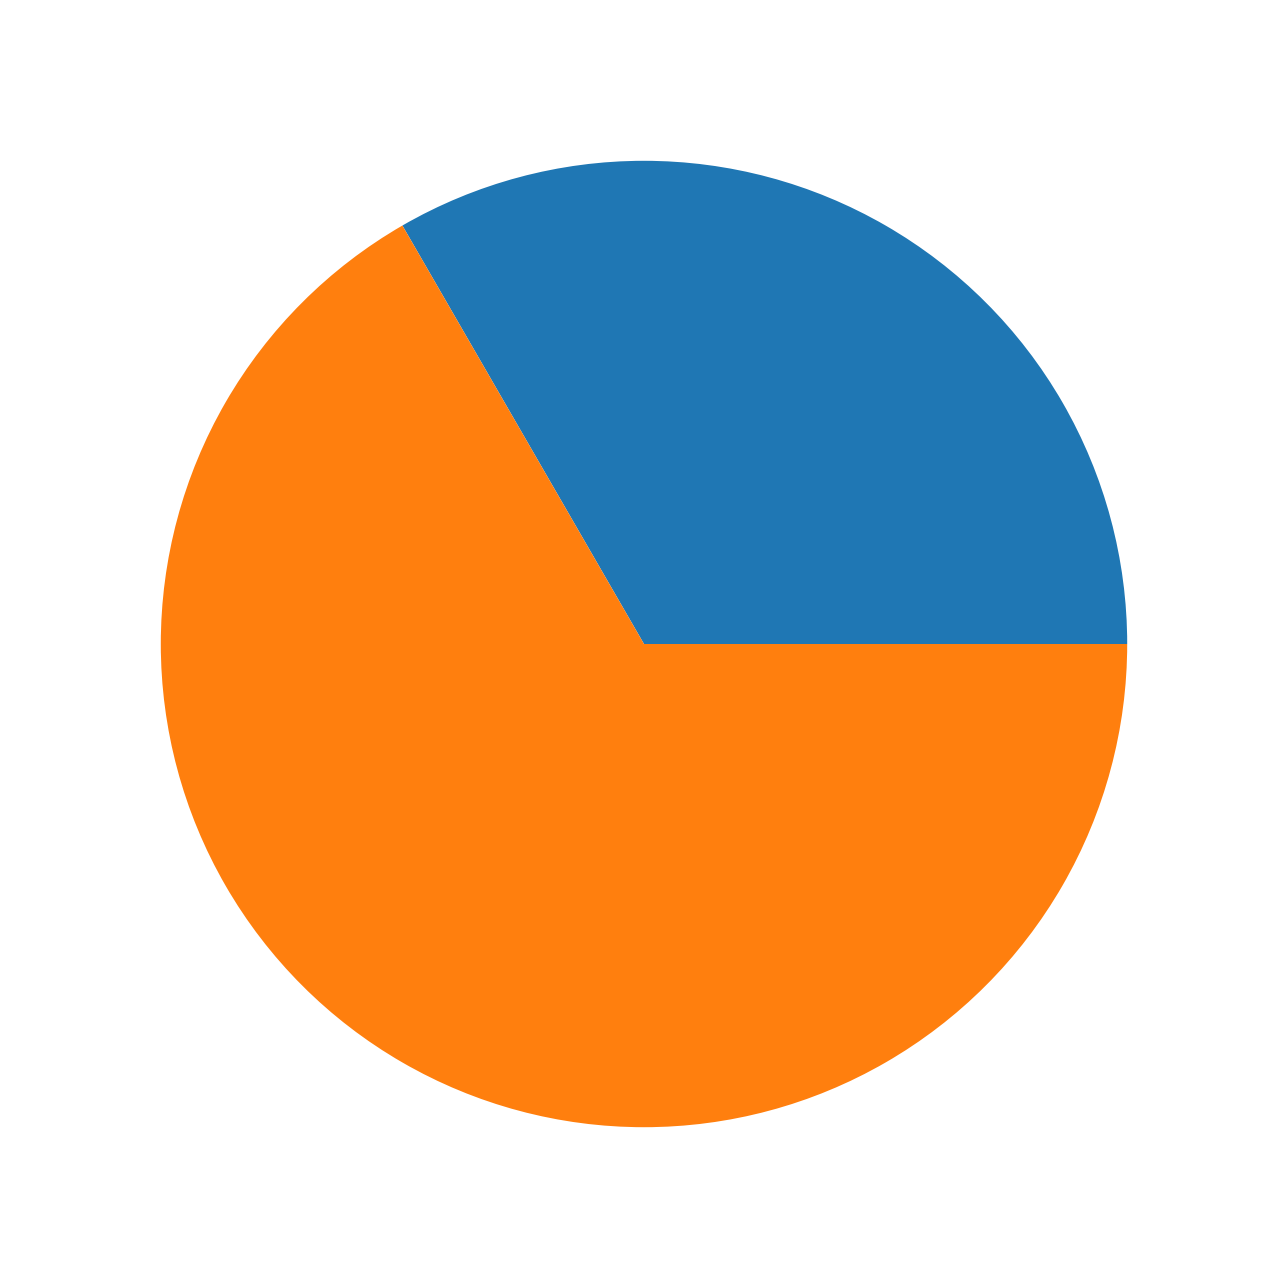

In [14]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

plt.pie([10,20])  #pie(x) x 가 가지고 있는 값을 비율로 표시
plt.show()

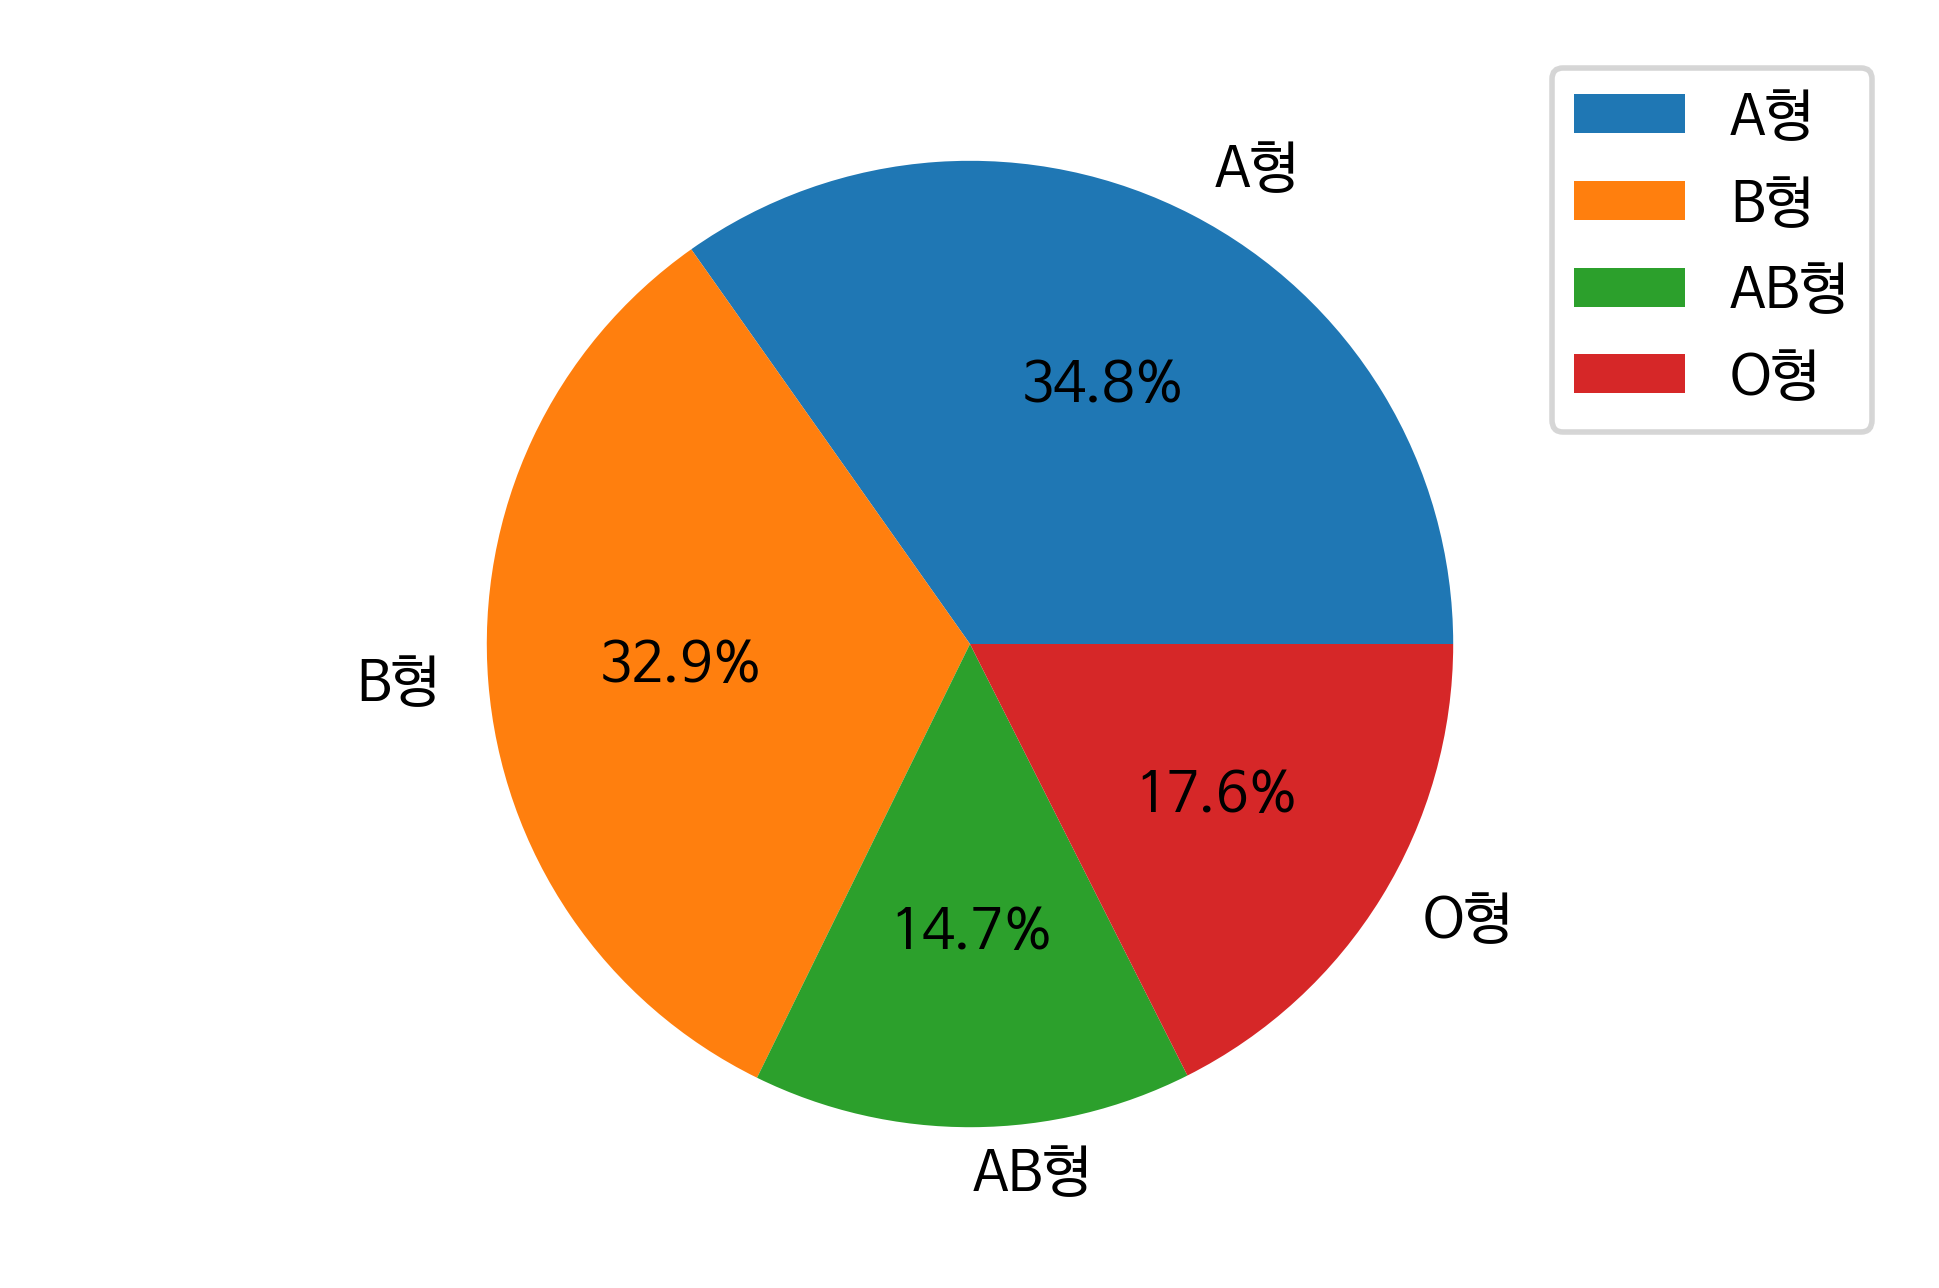

In [28]:
plt.figure(dpi=200)

size =[2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
plt.axis('equal')
plt.pie(size,labels=label,autopct='%.1f%%') #혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

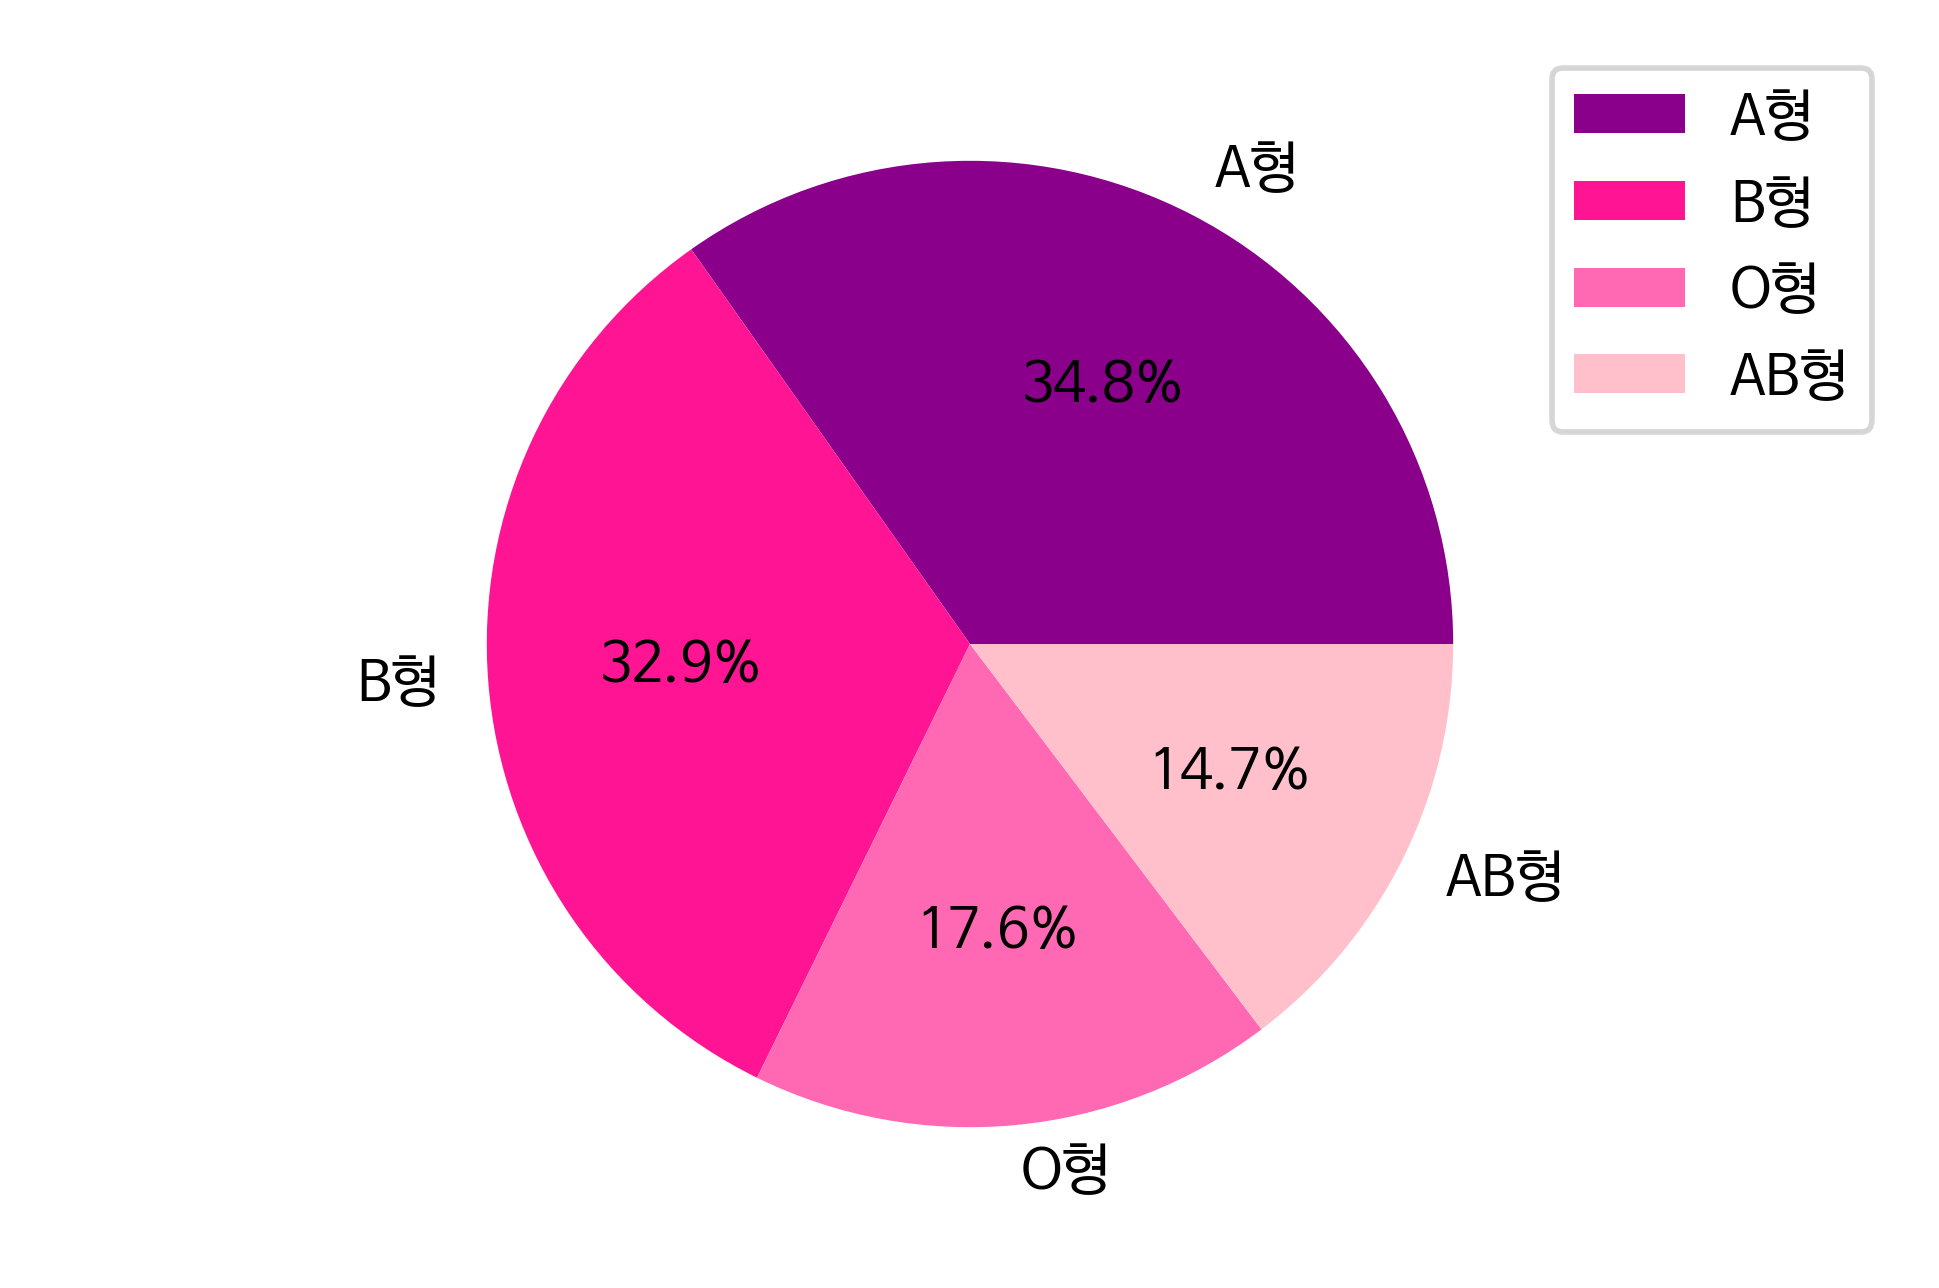

In [37]:
plt.figure(dpi=200)

size =[2441,2312,1233,1031]
label = ['A형','B형','O형','AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size,labels=label,autopct='%.1f%%',explode=(0,0,0,0),colors=color) #혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

제주도의 성별 인구 비율 표현하기

인구 구조가 알고 싶은 지역의 이름( 읍면동 단위)을 입력해주세요 : 제주특별자치도


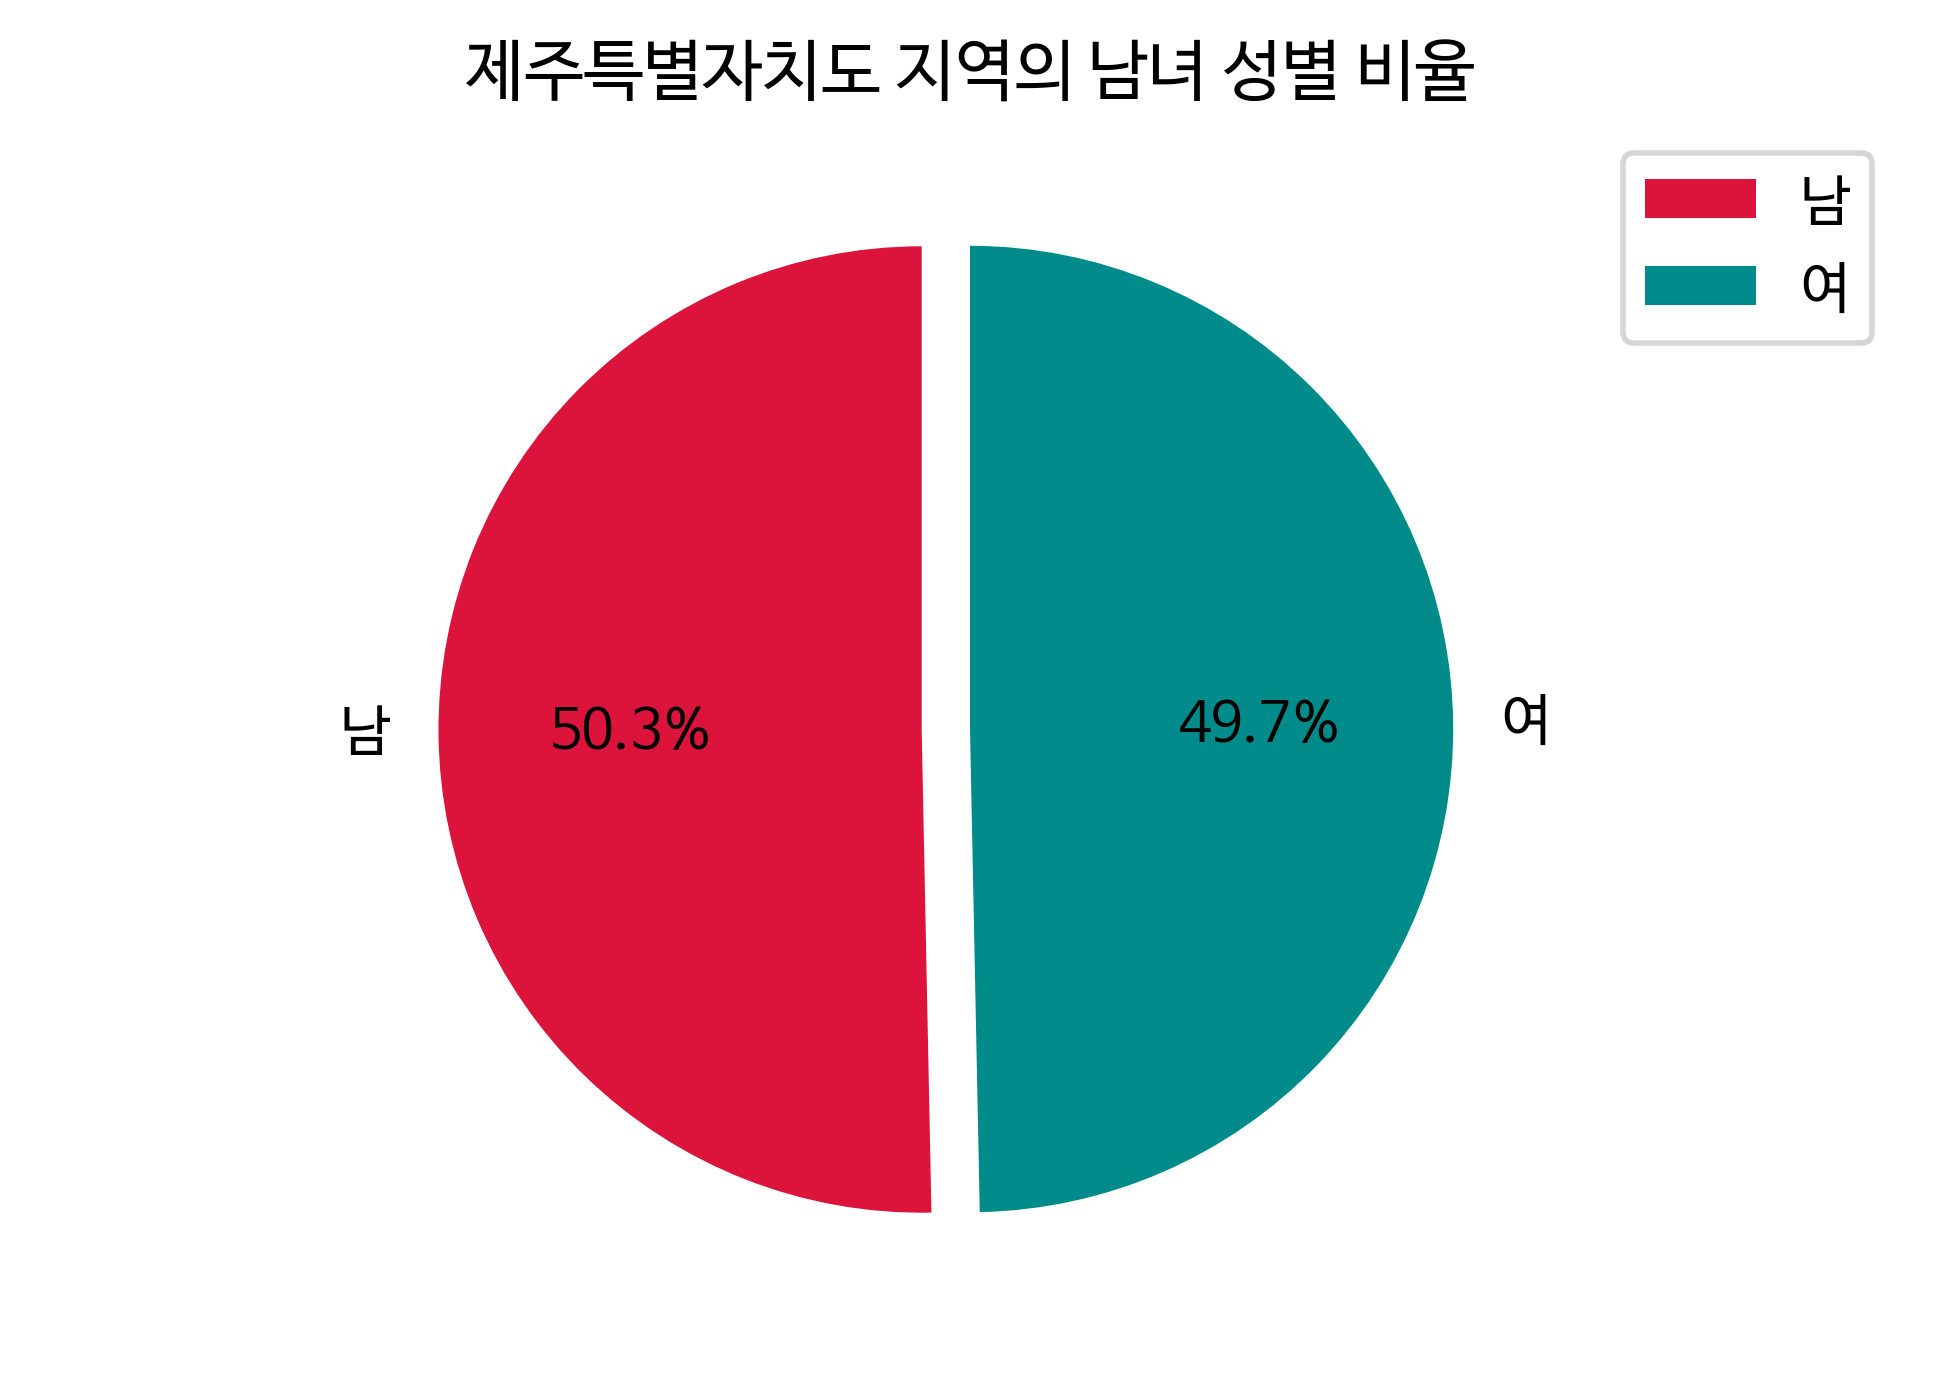

In [42]:
import csv
import matplotlib.pyplot as plt

f= open('gender.csv', encoding = 'cp949')
data=csv.reader(f)

size = [] #제주도의 남성 인구 합계,여성 인구 합계


name = input("인구 구조가 알고 싶은 지역의 이름( 읍면동 단위)을 입력해주세요 : ")

for row in data:
  if name in row[0]:
    m = 0 #남성 인구수 합계 변수
    f = 0 #여성 인구수 합계 변수
    for i in range(101):    
      m += int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',',''))
    break

size.append(m)
size.append(f)


#파이차트 시각화
plt.figure(dpi=200)
color = ['crimson', 'darkcyan']
label = ['남','여']
plt.axis('equal')
plt.pie(size,labels=label,autopct='%.1f%%',colors=color,explode=(0.1,0),startangle = 90) #혈액형의 비율을 임의로 작성
plt.title(name +' 지역의 남녀 성별 비율')
plt.legend()
plt.show()